In [2]:
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/Datalab/caltech256-subset.tar.gz'
!mkdir -p data
!tar -xf caltech256-subset.tar.gz -C data/

--2023-04-25 08:03:18--  https://cleanlab-public.s3.amazonaws.com/Datalab/caltech256-subset.tar.gz
Resolving cleanlab-public.s3.amazonaws.com (cleanlab-public.s3.amazonaws.com)... 52.216.210.121, 54.231.138.65, 52.217.18.188, ...
Connecting to cleanlab-public.s3.amazonaws.com (cleanlab-public.s3.amazonaws.com)|52.216.210.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44714415 (43M) [application/x-gzip]
Saving to: ‘caltech256-subset.tar.gz’

caltech256-subset.t 100%[===================>]  42.64M  20.1MB/s    in 2.1s    

2023-04-25 08:03:21 (20.1 MB/s) - ‘caltech256-subset.tar.gz’ saved [44714415/44714415]



In [10]:
!wget -nc 'https://cleanlab-public.s3.amazonaws.com/Datalab/pred_probs_and_features.tar.gz'

--2023-04-25 08:18:16--  https://cleanlab-public.s3.amazonaws.com/Datalab/pred_probs_and_features.tar.gz
Resolving cleanlab-public.s3.amazonaws.com (cleanlab-public.s3.amazonaws.com)... 3.5.27.142, 52.216.59.137, 3.5.16.216, ...
Connecting to cleanlab-public.s3.amazonaws.com (cleanlab-public.s3.amazonaws.com)|3.5.27.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2819875 (2.7M) [application/x-gzip]
Saving to: ‘pred_probs_and_features.tar.gz’

pred_probs_and_feat 100%[===================>]   2.69M  6.14MB/s    in 0.4s    

2023-04-25 08:18:18 (6.14 MB/s) - ‘pred_probs_and_features.tar.gz’ saved [2819875/2819875]



In [11]:
!tar -xf pred_probs_and_features.tar.gz -C data/

In [1]:
import numpy as np
features = np.load("data/features.npy")
pred_probs = np.load("data/pred_probs.npy")

In [2]:
from cleanlab import Datalab
from datasets import load_dataset

In [3]:
# dataset = load_dataset("cifar10", split="test")
dataset = load_dataset("imagefolder", data_dir="./data/caltech256-subset/", split="train")
print(dataset)

Resolving data files:   0%|          | 0/635 [00:00<?, ?it/s]

Found cached dataset imagefolder (/Users/sanjana/.cache/huggingface/datasets/imagefolder/default-ed059c2a7dc17a68/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


Dataset({
    features: ['image', 'label'],
    num_rows: 635
})


In [4]:
datalab = Datalab(data=dataset, label_name="label", image_key="image")
datalab.find_issues(features=features, pred_probs=pred_probs)

Finding label issues ...
Finding outlier issues ...
Fitting OOD estimator based on provided features ...
Finding near_duplicate issues ...
Finding dark, light, odd_aspect_ratio, low_information, blurry, grayscale images ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:09<00:00, 68.07it/s]

Audit complete. 58 issues found in the dataset.
8 images issues found in the dataset.


Here is a summary of the different kinds of issues found in the data:

    issue_type    score  num_issues
       outlier 0.735523          25
near_duplicate 0.244542          14
         label 0.982677          11

(Note: A lower score indicates a more severe issue across all examples in the dataset.)


---------------------- outlier issues ----------------------

Number of examples with this issue: 25
Overall dataset quality in terms of this issue: : 0.7355

Examples representing most severe instances of this issue:
     is_outlier_issue  outlier_score  nearest_neighbor  distance_to_nearest_neighbor
398              True       0.412073               257                      0.848089
397              True       0.420990               149                      0.845467
633              True       0.425188               396                      0.846003
241              True       0.427850               119                      0.817756
396              True       0.431380               

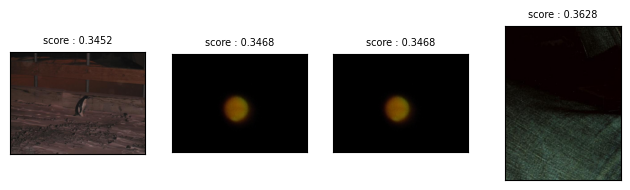

------------------ low_information images ------------------

Number of examples with this issue: 2



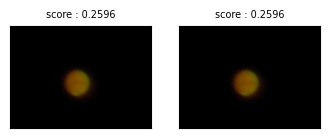

---------------------- blurry images -----------------------

Number of examples with this issue: 1



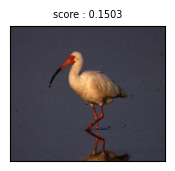

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 1



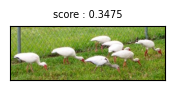

In [5]:
datalab.report(include_description=False)

In [6]:
datalab.issues

,is_label_issue,label_score,is_outlier_issue,outlier_score,is_near_duplicate_issue,near_duplicate_score,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue
0,False,0.908196,False,0.724541,False,0.259520,0.750000,False,0.814892,False,0.951534,False,1,False,0.831525,False,0.278343,False
1,False,0.950729,False,0.748668,False,0.241014,0.812236,False,0.880276,False,0.893208,False,1,False,0.939370,False,0.344471,False
2,False,0.944046,False,0.758148,False,0.234385,0.667188,False,0.859424,False,0.835395,False,1,False,0.938941,False,0.345257,False
3,False,0.999130,False,0.675659,False,0.318693,0.781250,False,0.775279,False,0.976674,False,1,False,0.944584,False,0.388955,False
4,False,0.709343,False,0.607793,False,0.445085,0.945634,False,0.815254,False,0.697109,False,1,False,0.893437,False,0.278521,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,False,0.230145,True,0.434115,False,0.668122,0.926573,False,0.896248,False,0.976391,False,1,False,0.935553,False,0.453195,False
631,False,0.142439,True,0.512190,False,0.567681,0.673469,False,0.921847,False,0.797200,False,1,False,0.961885,False,0.551261,False
632,True,0.049026,True,0.449029,False,0.637721,0.750623,False,0.882811,False,0.979461,False,1,False,0.815227,False,0.393713,False
633,False,0.088445,True,0.425188,False,0.688975,0.754491,False,0.665648,False,0.980721,False,1,False,0.362802,True,0.890101,False


In [8]:
datalab.info.keys()

dict_keys(['statistics', 'label', 'outlier', 'near_duplicate', 'dark', 'light', 'odd_aspect_ratio', 'low_information', 'blurry', 'grayscale'])

In [9]:
datalab.issue_summary

,issue_type,score,num_issues
0,label,0.982677,11
1,outlier,0.735523,25
2,near_duplicate,0.244542,14
3,dark,NaN,4
4,low_information,NaN,2
5,blurry,NaN,1
6,odd_aspect_ratio,NaN,1
7,grayscale,NaN,0
8,light,NaN,0


In [11]:
datalab.get_issues("label")

,is_label_issue,label_score,given_label,predicted_label
0,False,0.908196,080.frog,080.frog
1,False,0.950729,080.frog,080.frog
2,False,0.944046,080.frog,080.frog
3,False,0.999130,080.frog,080.frog
4,False,0.709343,080.frog,080.frog
...,...,...,...,...
630,False,0.230145,256.toad,080.frog
631,False,0.142439,256.toad,207.swan
632,True,0.049026,256.toad,080.frog
633,False,0.088445,256.toad,207.swan


In [13]:
datalab.get_summary("dark")

,issue_type,score,num_issues
0,dark,NaN,4


In [14]:
datalab.get_info("dark")

,brightness_perc_1,brightness_perc_5,brightness_perc_10,brightness_perc_15,brightness_perc_90,brightness_perc_95,brightness_perc_99
0,0.042650,0.048466,0.056285,0.076181,0.612901,0.682280,0.831525
1,0.075340,0.106792,0.120166,0.129391,0.755964,0.839846,0.939370
2,0.042650,0.164605,0.266746,0.293668,0.634819,0.746285,0.938941
3,0.015985,0.023326,0.026851,0.028368,0.680948,0.795914,0.944584
4,0.265624,0.302891,0.385589,0.557592,0.878967,0.884645,0.893437
...,...,...,...,...,...,...,...
630,0.012002,0.023609,0.033734,0.042650,0.801298,0.899341,0.935553
631,0.111384,0.202800,0.275934,0.342604,0.911506,0.926374,0.961885
632,0.017630,0.020539,0.034007,0.056663,0.541202,0.628811,0.815227
633,0.013903,0.019279,0.019279,0.019279,0.257879,0.294827,0.362802
